In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

names = ["Nearest Neighbors", "Decision Tree", "Random Forest"]
classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=10,max_depth=5,max_features=1),
]

X, y = make_classification(n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=.3,random_state=0),
    make_circles(noise=.2,factor=.5,random_state=1),
    linearly_separable,
]

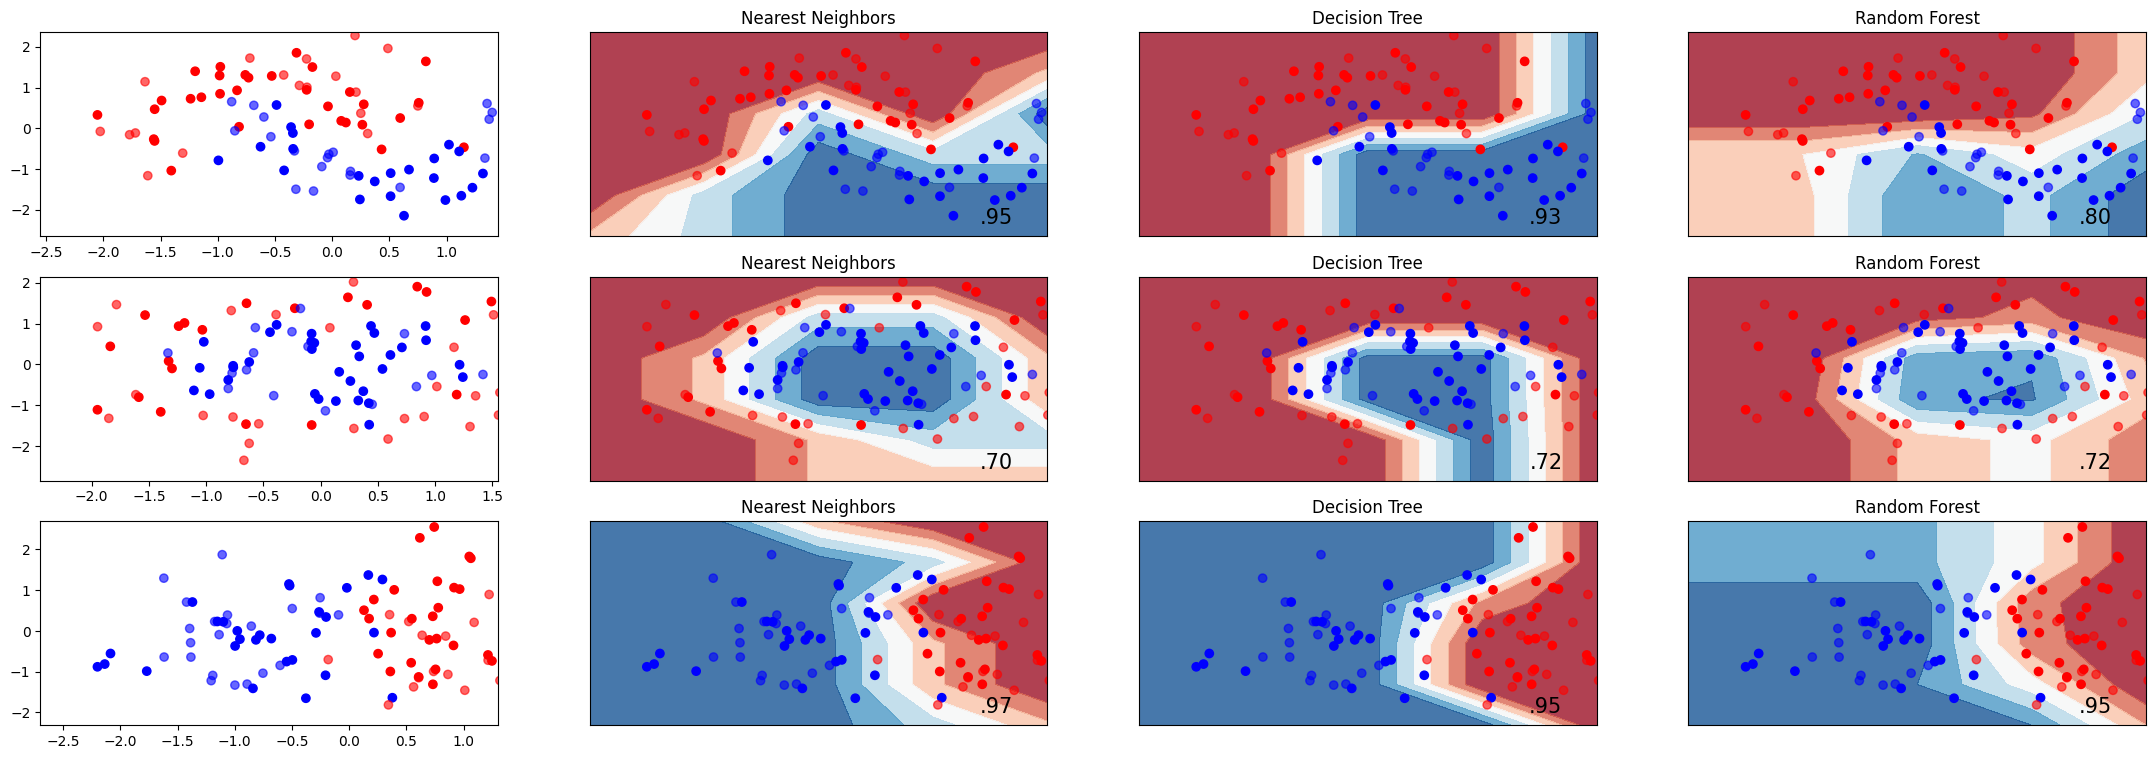

In [26]:
figure = plt.figure(figsize=(27,9))
i = 1
for ds in datasets:
    X, y = ds
    X = StandardScaler().fit_transform(X)
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min,x_max),np.arange(y_min,y_max))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets),len(classifiers)+1,i)

    ax.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_bright)
    ax.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_bright,alpha=.6)
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets),len(classifiers)+1,i)
        i += 1
        clf.fit(x_train,y_train)
        score = clf.score(x_test,y_test)
        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.8)

        ax.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_bright)
        ax.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_bright,alpha=.6)
        
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())

        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max()-.3,yy.min()+.3, ('%.2f'%score).lstrip('0'),size=15,horizontalalignment='right')
figure.subplots_adjust(left=.2,right=.98)
plt.show()
